In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/reprocessed.hungarian.data', header=None, sep='\s+')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [2]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [3]:
# 결측치 확인

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    int64  
 11  ca        294 non-null    int64  
 12  thal      294 non-null    int64  
 13  num       294 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


Text(0.5, 1.0, 'Distribution of Heart Disease Levels')

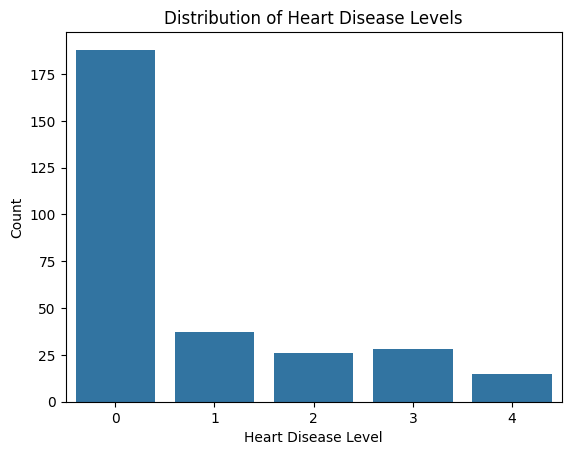

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel('Heart Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Heart Disease Levels')

In [7]:
# 레이블 갯수 확인 (숫자)
df['num'].value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64

In [8]:
X=df.drop('num',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9


In [9]:
y=df['num']
y.value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64

In [10]:
y.head()

0    0
1    1
2    0
3    3
4    0
Name: num, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [12]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [13]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(260, 5, 13) (260,)
(26, 5, 13) (26,)


In [14]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [15]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [17]:
# define model

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling1D, TimeDistributed, LSTM, BatchNormalization, Input, concatenate, Conv1D


model = Sequential()
model.add(LSTM(100,input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(Dropout(0.5))

model.add(Conv1D(filters=64,
                 kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(Conv1D(filters=64,
                 kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(Dropout(0.5))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5, 100)            45600     
                                                                 
 dropout_2 (Dropout)         (None, 5, 100)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 64)             19264     
                                                                 
 dropout_3 (Dropout)         (None, 5, 64)             0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 64)             0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 2, 100)            66000     
                                                      

In [18]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True, validation_split=0.1)

Epoch 1/30
8/8 [==============================] - 8s 179ms/step - loss: 1.4022 - accuracy: 0.5598 - val_loss: 1.2480 - val_accuracy: 0.7692
Epoch 2/30
8/8 [==============================] - 0s 23ms/step - loss: 1.2635 - accuracy: 0.6368 - val_loss: 1.0949 - val_accuracy: 0.7692
Epoch 3/30
8/8 [==============================] - 0s 19ms/step - loss: 1.2082 - accuracy: 0.6368 - val_loss: 1.1656 - val_accuracy: 0.7692
Epoch 4/30
8/8 [==============================] - 0s 18ms/step - loss: 1.1987 - accuracy: 0.6368 - val_loss: 1.2476 - val_accuracy: 0.7692
Epoch 5/30
8/8 [==============================] - 0s 18ms/step - loss: 1.1964 - accuracy: 0.6368 - val_loss: 1.2374 - val_accuracy: 0.7692
Epoch 6/30
8/8 [==============================] - 0s 21ms/step - loss: 1.2035 - accuracy: 0.6368 - val_loss: 1.2052 - val_accuracy: 0.7692
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 1.1941 - accuracy: 0.6368 - val_loss: 1.1996 - val_accuracy: 0.7692
Epoch 8/30
8/8 [==========

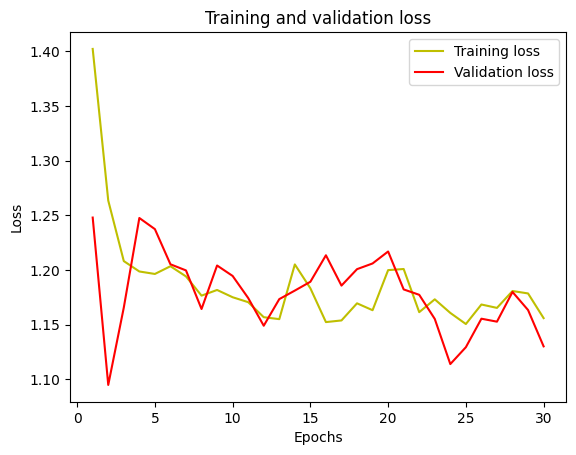

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

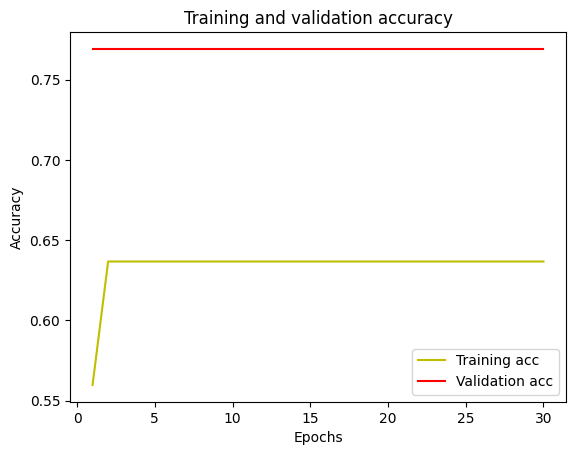

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 2s 2s/step


In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class, zero_division=1))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        15
           1       1.00      0.00      0.00         3
           2       1.00      0.00      0.00         5
           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         2

    accuracy                           0.58        26
   macro avg       0.92      0.20      0.15        26
weighted avg       0.76      0.58      0.42        26

[[15  0  0  0  0]
 [ 3  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]]
